## Tensorflow 로 직접 구현하는 Logistic Regression
#### LinearRegession :      Y = WX + b                 #선형방정식
#### LogisticRegression :  Y = sigmoid(WX + b) #선형+비선형방정식(exp:지수함수)

- sigmoid 특성 : 최소값0, 최대값 1이므로 확률로 해석합니다

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [103]:
x = [[150,50],[155,55],[155,80],[160,55],[145,55]] #여성의 키, 몸무게
y = [[0],[0],[1],[0],[1]] 
x_test = [[130,35], [150,45],[160,80],[170,57],[180,70]]

In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(x) # x의 최소 최대값을 계산해두고
x = scaler.transform(x) #정규화한다
x_test = scaler.transform(x_test)

In [105]:
W = tf.Variable(tf.random_normal(shape=[2]))
b = tf.Variable(tf.random_normal(shape=[1]))
z = tf.reduce_sum(W*x, axis=1, keepdims=True) + b
hypothesis = 1/(1+tf.exp(-z))
cost = tf.reduce_mean(tf.square(hypothesis - y)) #MSE 
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [106]:
z_test = tf.reduce_sum(W*x_test, axis=1, keepdims=True) + b
hypothesis_test = 1/(1+tf.exp(-z_test))

In [ ]:
for i in range(10000):
    sess.run(train) # w와 b 가 update 됩니다 
    #if i%100==0: print(sess.run([cost,W]))
sess.run(hypothesis),sess.run(hypothesis_test) # 모델의 역활은 여기서 끝

In [108]:
np.round(sess.run(hypothesis_test))

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

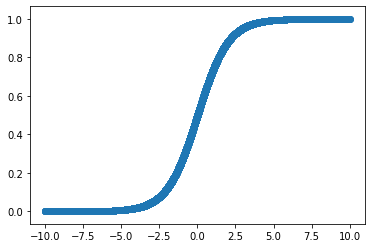

In [18]:
#test = np.arange(-10,10,0.001)
#plt.scatter(x, 1/(1+np.exp(-x)))